# Motivation

* What is the dataset?

*This Notebook covers data analysis in regards to the COVID-19. The data comes from CSSEGISandData's Github repository: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data). This repository contains multiple files which contain daily information about how many people are confirmed, recovered and died in different countries in regards to COVID-19. It also contains files with the same information for the major cities in the US. The cities and countries are also supported by GPS coordinates, which makes it easy to plot on a map. Furthermore, data about the total population and population densities are gathered from the [United Nations](https://population.un.org/wpp/Download/Standard/CSV/), which will be used to enhance the dataset for the different countries. And for population and population densities for the states in the US a dataset from [World Population Review](https://worldpopulationreview.com/states/state-densities/) has been used. For the number of tests performed by each state the data has been collected from [Covidtracking](https://covidtracking.com/api)*

* Why did we choose this dataset?

*COVID-19 is currently terrorizing the entire globe, and its spread seems endless. It has spread far and wide, starting in mainland china, then making its way to Europe before decimating the United States. It is almost impossible to go through one's day and not be affected by the changes caused by the epidemic.*

*But what factors are in play when COVID-19 spreads far and wide? How do population and population density affect the spread of the decease? These are the questions the different data sets will help shed light upon and thereby, hopefully, gain insight into why COVID-19 is hitting some countries and cities harder than others.*

* What was the goal for the end user's experience?

*The goal for the end user's experience is to provide him with an overview of how COVID-19 has spread across the world and the US. The goal is also the make the end-user understand which factors correlate with the spread of the virus in terms of population and population densities.*

# Basic stats

First of all, the different libraries that will be used in this Notebook are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import folium
import imageio
from folium import plugins

#For saving folium maps as PNG
from selenium import webdriver
driver = webdriver.Firefox(executable_path=r'C:\Users\Mikkel\1 Python Notebooks\Social Data\geckodriver.exe')
import io
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = 14, 7

Now the data from for the COVID-19 statistics are loaded into data frames directly from the URL, so it always runs with the latest data. There will, in total, be three data frames with information about the different countries. That will be one that shows the number of confirmed cases, one with the number of recovered cases, and one with the number of deaths. Furthermore, there will be two data frames for the major cities in the US. One with confirmed cases and one with deaths.

All data frames will remove data entries from 'Diamond Princess' and 'MS Zaandam', as these are ships and will therefore not be considered.

In [3]:
#Loading COVID-19 data
dfCGlobal = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfRGlobal = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
dfDGlobal = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfCGlobal = dfCGlobal[(dfCGlobal['Country/Region'] != 'Diamond Princess') & (dfCGlobal['Country/Region'] != 'MS Zaandam')]
dfRGlobal = dfRGlobal[(dfRGlobal['Country/Region'] != 'Diamond Princess') & (dfRGlobal['Country/Region'] != 'MS Zaandam')]
dfDGlobal = dfDGlobal[(dfDGlobal['Country/Region'] != 'Diamond Princess') & (dfDGlobal['Country/Region'] != 'MS Zaandam')]
dfCGlobal = dfCGlobal.reset_index()
dfRGlobal = dfRGlobal.reset_index()
dfDGlobal = dfDGlobal.reset_index()


dfCUS = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
dfCUS['Long'] = dfCUS['Long_']
dfDUS = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
dfDUS['Long'] = dfDUS['Long_']

dfCUS = dfCUS[(dfCUS['Province_State'] != 'Diamond Princess') & (dfCUS['Province_State'] != 'MS Zaandam') & (dfCUS['Province_State'] != 'Grand Princess') & (dfCUS['iso2'] == 'US') & (dfCUS['Province_State'] != 'District of Columbia')]
dfDUS = dfDUS[(dfDUS['Province_State'] != 'Diamond Princess') & (dfDUS['Province_State'] != 'MS Zaandam') & (dfCUS['Province_State'] != 'Grand Princess') & (dfCUS['iso2'] == 'US') & (dfCUS['Province_State'] != 'District of Columbia')]

dfCUS = dfCUS.reset_index()
dfDUS = dfDUS.reset_index()

dates = list(dfCGlobal.columns[5:])

dfCUS.head(5)

index       UID iso2 iso3  code3    FIPS   Admin2 Province_State  \
0      5  84001001   US  USA    840  1001.0  Autauga        Alabama   
1      6  84001003   US  USA    840  1003.0  Baldwin        Alabama   
2      7  84001005   US  USA    840  1005.0  Barbour        Alabama   
3      8  84001007   US  USA    840  1007.0     Bibb        Alabama   
4      9  84001009   US  USA    840  1009.0   Blount        Alabama   

  Country_Region        Lat  ...  5/5/20 5/6/20  5/7/20  5/8/20  5/9/20  \
0             US  32.539527  ...      53     58      61      67      68   
1             US  30.727750  ...     189    196     205     208     216   
2             US  31.868263  ...      47     47      51      53      58   
3             US  32.996421  ...      43     43      44      44      45   
4             US  33.982109  ...      40     42      44      44      44   

   5/10/20  5/11/20  5/12/20  5/13/20       Long  
0       74       84       91       93 -86.644082  
1      222      224      227      231 -87.722071  
2       59       61       67       69 -85.387129  
3       46       46       46       46 -87.125115  
4       44       45       45       45 -86.567906  

[5 rows x 126 columns]

Now a data frame containing information about the countries' population and population densities are loaded. This data will later be used to consider the population and population densities when looking at the growth rate and different cases.

In [4]:
dfCountryPopulation = pd.read_csv('CountryPopulation.csv', delimiter=',,', engine='python')

dfCountryPopulation = (dfCountryPopulation[(dfCountryPopulation['Time'] == 2020)].groupby('Location').mean()*1000).round(0)[['PopTotal', 'PopDensity']]
dfCountryPopulation.head(5)

PopTotal  PopDensity
Location                                               
Afghanistan                    3.892834e+07     59627.0
Africa                         1.340598e+09     45216.0
African Group                  1.338827e+09     45571.0
African Union                  1.339424e+09     45182.0
African Union: Central Africa  1.586196e+08     30066.0

For each country, the data frame contains information about their population and their population density per 1000 square km.

In [5]:
dfStatePopulation = pd.read_csv('USPopulation.csv')
dfStatePopulation = dfStatePopulation.set_index('State')[['Pop', 'Density']]
dfStatePopulation['Density'] = dfStatePopulation.apply(lambda row : row['Density']*2.59, axis=1)
dfStatePopulation.head(5)

Pop       Density
State                                      
District of Columbia   720687  30599.661190
New Jersey            8936574   3147.365669
Rhode Island          1056161   2645.509657
Massachusetts         6976597   2316.587945
Connecticut           3563077   1905.900451

On the other hand, for each state in the US, the data frame contains information about the population in the state and its population density per square km. Here it can be seen that the District of Columbia (DC) has a high density compared to the rest of the states. This is because DC only contains the capital of the US, Washington, DC. As it is a city in comparison to states, the density is much higher while the population is significantly lower. 

In [6]:
dfTestsUS = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')[['date', 'state', 'totalTestResults']]

statesmap = {'AL':'Alabama',
 'AK':'Alaska',
 'AS':'American Samoa',
 'AZ':'Arizona',
 'AR':'Arkansas',
 'CA':'California',
 'CO':'Colorado',
 'CT':'Connecticut',
 'DE':'Delaware',
 'DC':'District of Columbia',
 'FL':'Florida',
 'GA':'Georgia',
 'GU':'Guam',
 'HI':'Hawaii',
 'ID':'Idaho',
 'IL':'Illinois',
 'IN':'Indiana',
 'IA':'Iowa',
 'KS':'Kansas',
 'KY':'Kentucky',
 'LA':'Louisiana',
 'ME':'Maine',
 'MD':'Maryland',
 'MA':'Massachusetts',
 'MI':'Michigan',
 'MN':'Minnesota',
 'MS':'Mississippi',
 'MO':'Missouri',
 'MT':'Montana',
 'NE':'Nebraska',
 'NV':'Nevada',
 'NH':'New Hampshire',
 'NJ':'New Jersey',
 'NM':'New Mexico',
 'NY':'New York',
 'MP':'Northern Mariana Islands',
 'NC':'North Carolina',
 'ND':'North Dakota',
 'OH':'Ohio',
 'OK':'Oklahoma',
 'OR':'Oregon',
 'PA':'Pennsylvania',
 'PR':'Puerto Rico',
 'RI':'Rhode Island',
 'SC':'South Carolina',
 'SD':'South Dakota',
 'TN':'Tennessee',
 'TX':'Texas',
 'UT':'Utah',
 'VT':'Vermont',
 'VA':'Virginia',
 'VI':'Virgin Islands',
 'WA':'Washington',
 'WV':'West Virginia',
 'WI':'Wisconsin',
 'WY':'Wyoming'}

testsUS = {}

for i, (date, state, tests) in dfTestsUS.iterrows():
    date = str(date)
    date = '{}/{}/{}'.format(int(date[4:6]), int(date[-2:]), 20)
    if date not in testsUS:
        testsUS[date] = {}
    testsUS[date][statesmap[state]] = tests
    
testsUS

{'5/13/20': {'Alaska': 30649,
  'Alabama': 136372,
  'Arkansas': 73215,
  'American Samoa': 105,
  'Arizona': 127750,
  'California': 1065592,
  'Colorado': 111250,
  'Connecticut': 142943,
  'District of Columbia': 31658,
  'Delaware': 34753,
  'Florida': 594763,
  'Georgia': 273904,
  'Guam': 4262,
  'Hawaii': 38365,
  'Iowa': 85719,
  'Idaho': 33128,
  'Illinois': 489359,
  'Indiana': 154083,
  'Kansas': 57628,
  'Kentucky': 110634,
  'Louisiana': 237904,
  'Massachusetts': 410032,
  'Maryland': 173574,
  'Maine': 23607,
  'Michigan': 308260,
  'Minnesota': 122035,
  'Missouri': 124142,
  'Northern Mariana Islands': 3040,
  'Mississippi': 100048,
  'Montana': 23852,
  'North Carolina': 210457,
  'North Dakota': 48945,
  'Nebraska': 49725,
  'New Hampshire': 37216,
  'New Jersey': 441450,
  'New Mexico': 110289,
  'Nevada': 66672,
  'New York': 1258907,
  'Ohio': 225854,
  'Oklahoma': 109127,
  'Oregon': 83987,
  'Pennsylvania': 302869,
  'Puerto Rico': 2329,
  'Rhode Island': 97922,

### Basic distributions

The graph below shows the total confirmed cases, the total recovered cases, and the total deaths globally on a logarithmic scale. The initial response to COVID-19 was not spectacular, as the number of deaths started off being higher than the number of recovered. Slowly but surely the Coronavirus got taken more seriously and got global attention, meaning the recovery rate started rapidly increasing. Then when mid-Marts came around, the total confirmed cases and total deaths started to increase its growth rate, with the number of recovered not following suit. 

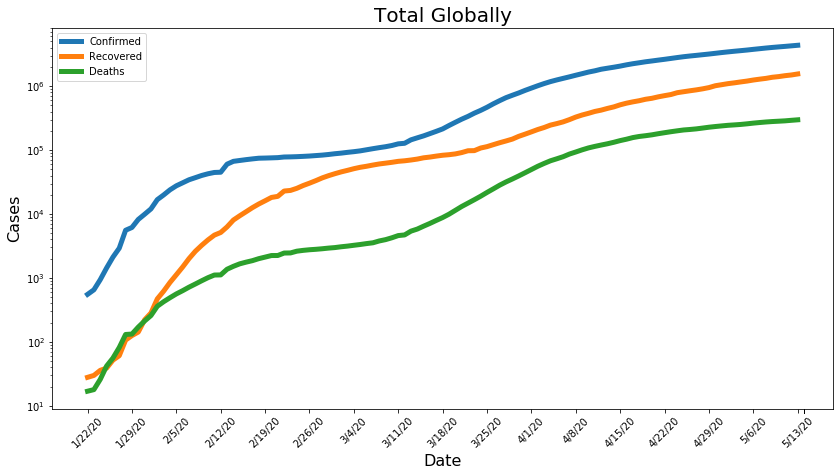

In [7]:
plt.plot(dates, [sum(dfCGlobal[date]) for date in dates], linewidth=5)
plt.plot(dates, [sum(dfRGlobal[date]) for date in dates], linewidth=5)
plt.plot(dates, [sum(dfDGlobal[date]) for date in dates], linewidth=5)
plt.legend(['Confirmed', 'Recovered', 'Deaths'])
plt.title('Total Globally', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(['' if i % 7 != 0 else date for i, date in enumerate(dates)], rotation=45)
plt.yscale('log')
plt.show()

The below graph shows the total number of confirmed cases per country, filtered for countries that have over 5000 cases. As can be seen, the US has by far the most confirmed cases, where in Europe it is Spain and Italy who have the most confirmed cases.

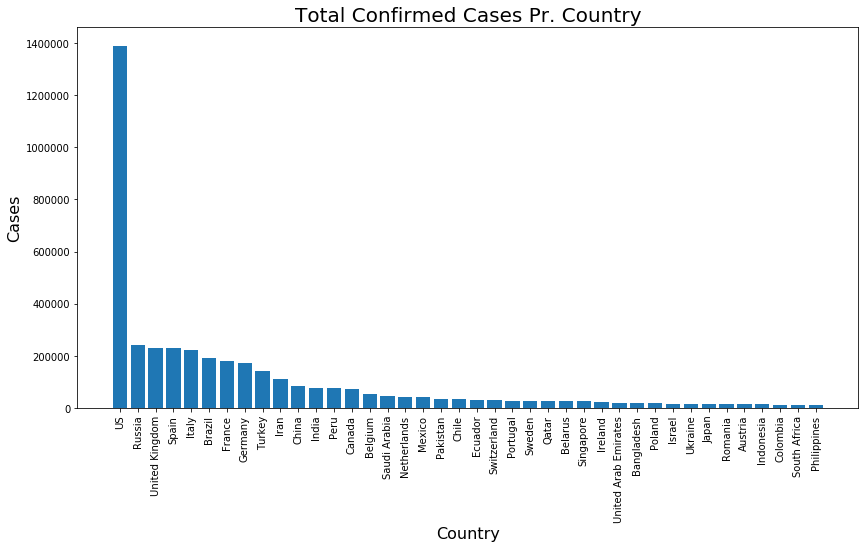

In [8]:
ordered = sorted(dict(dfCGlobal.groupby('Country/Region').sum()[dates[-1]]).items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v) for k, v in ordered][:40]
groups, amounts = zip(*ordered)
focusCountries = list(groups[:17])
focusCountries.extend(['Denmark', 'Sweden', 'Norway'])
plt.bar(groups, amounts)
plt.title('Total Confirmed Cases Pr. Country', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

When then looking at the total number of deaths per country that have over 200 deaths, it can be seen that the US, Italy and Spain have the most deaths. It is interesting to see that Germany had roughly the same confirmed cases as France and the UK, but has significantly fewer deaths compared to France and the UK. This could indicate that Germany took a different approach to COVID-19 than the others and that its paid dividends for them.

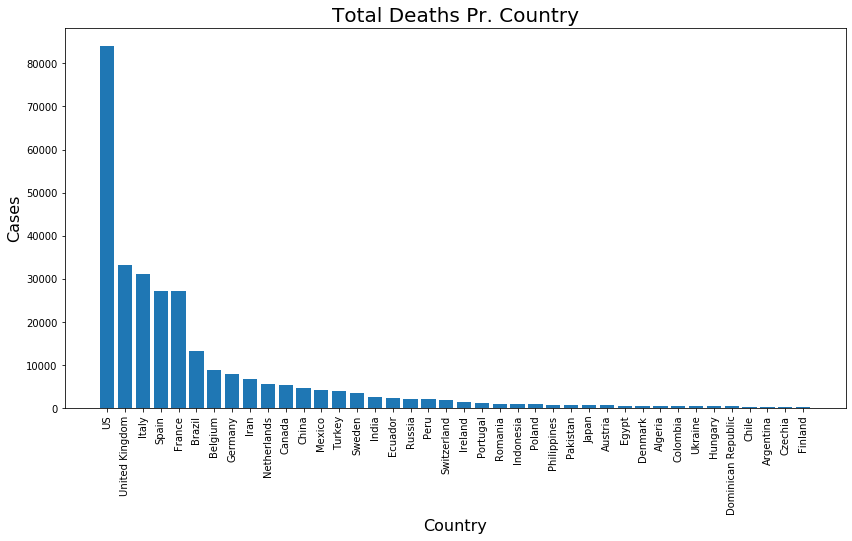

In [9]:
ordered = sorted(dict(dfDGlobal.groupby('Country/Region').sum()[dates[-1]]).items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v) for k, v in ordered][:40]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Total Deaths Pr. Country', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

As the US is highest on both the list of cases and deaths, taking a closer look at the US and how it escalated could provide answers to why this is the case. The below graph shows the total confirmed cases, the total deaths and the total number of tests per date in the US. 

It can be seen that the total confirmed cases started to grow exponentially around 4th of Marts and seem to slow down from the beginning of April.
However, it can be seen that it follows the same growth rate of the number of performed tests. This could indicate that even though it seems like the growth rate of the confirmed cases seems to go down. It can be due to lack of testing and suggest that there exists a substantial number of people who have Coronavirus but have not been tested and confirmed cases. 

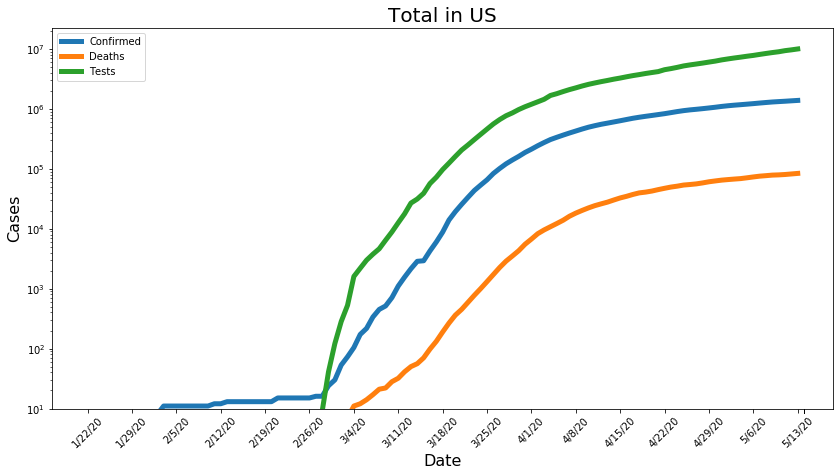

In [10]:
dailyTotalTests = {date : sum(values.values()) for date, values in testsUS.items()}

plt.plot(dates, [sum(dfCUS[date]) for date in dates], linewidth=5)
plt.plot(dates, [sum(dfDUS[date]) for date in dates], linewidth=5)
plt.plot(dates, [dailyTotalTests[date] for date in dates], linewidth=5)
plt.legend(['Confirmed', 'Deaths', 'Tests'])
plt.title('Total in US', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(['' if i % 7 != 0 else date for i, date in enumerate(dates)], rotation=45)
plt.yscale('log')
plt.ylim(10)
plt.show()

By taking a closer view at how each state is handling the Coronavirus, it can be seen that New York definitely has the highest amount of confirmed cases followed by New Jersey and Massachusetts, both of which are located close to New York.

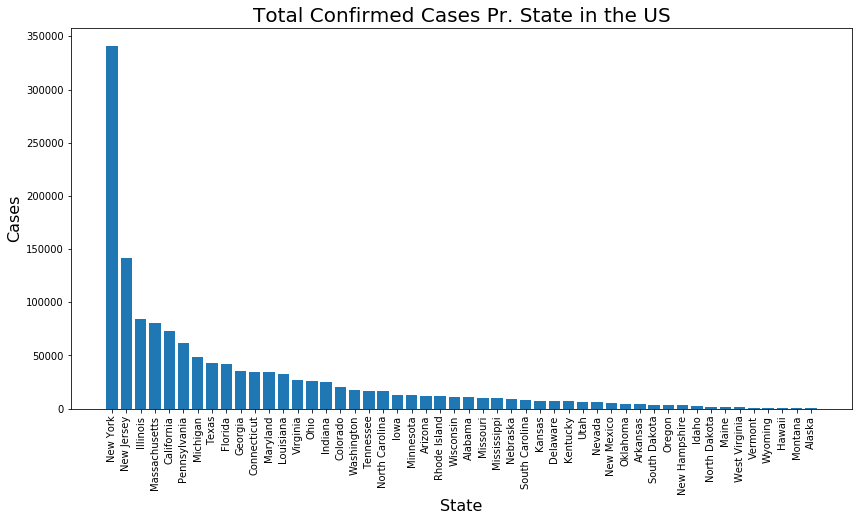

In [11]:
ordered = sorted(dict(dfCUS.groupby('Province_State').sum()[dates[-1]]).items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v) for k, v in ordered]
groups, amounts = zip(*ordered)
focusStates = list(groups[:20])
plt.bar(groups, amounts)
plt.title('Total Confirmed Cases Pr. State in the US', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

Likewise looking at the total deaths per state in the US New York is unsurprisingly the state with the highest amount of deaths, as it also had the most amount of confirmed cases. It is worth noticing that California, which was the state with the 5th highest amount of confirmed cases, are the state with the 8th most deaths.  

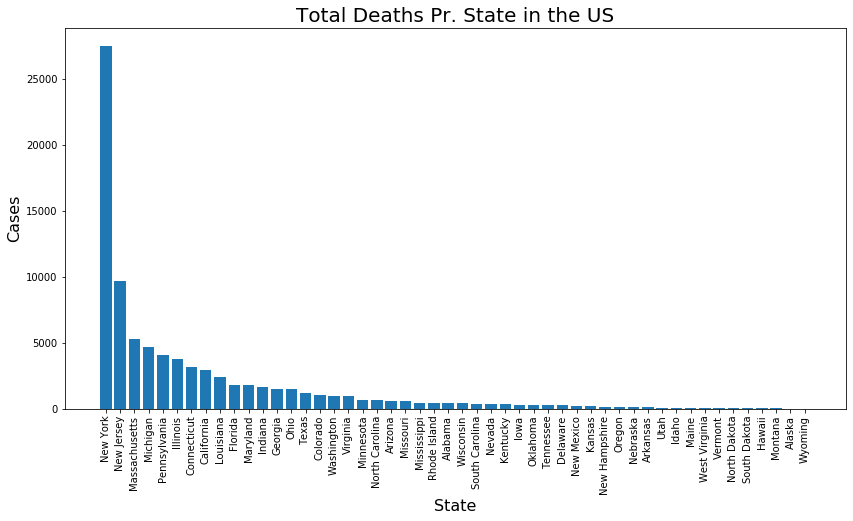

In [12]:
ordered = sorted(dict(dfDUS.groupby('Province_State').sum()[dates[-1]]).items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v) for k, v in ordered]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Total Deaths Pr. State in the US', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Data Analysis

To see how the population affects the total number of confirmed cases, the total number of confirmed cases per one million citizens are plotted for each country. Furthermore, the US is no longer the country with the highest amount of confirmed cases as the US has so many citizens in comparison to other countries. It is, however, interesting to see small countries like San Marino, Holy See, Andorra and Luxembourg appear to be the countries with the most confirmed cases per one million citizens.

Countries like the Holy See only have 825 inhabitants, but if they have even a few confirmed cases, the number of cases per million is substantially higher.

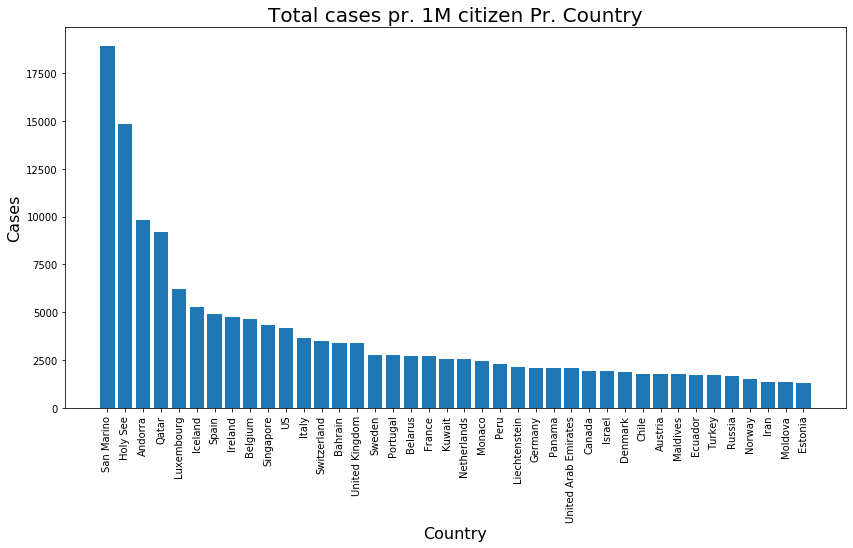

In [13]:
countrydata = {key : value/dfCountryPopulation['PopTotal'][key] for key, value in dict(dfCGlobal.groupby('Country/Region').sum()[dates[-1]]).items()}
ordered = sorted(countrydata.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v*1000000) for k, v in ordered][:40]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Total cases pr. 1M citizen Pr. Country', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

The below graph now shows the total cases per population density, which means that countries with a low density should be ranked higher if they also have a lot of confirmed cases. Furthermore, as seen, the US, Canada and Russia are large countries but with low population density. Moreover, combined with their high amount of confirmed cases, they are ranked high. 

This can still, however, be misleading, as people tend to live in cities and are not spread out all over the country. Therefore it can be necessary to take a closer look at, for instance, the US, to see how this relates on state and city basis.

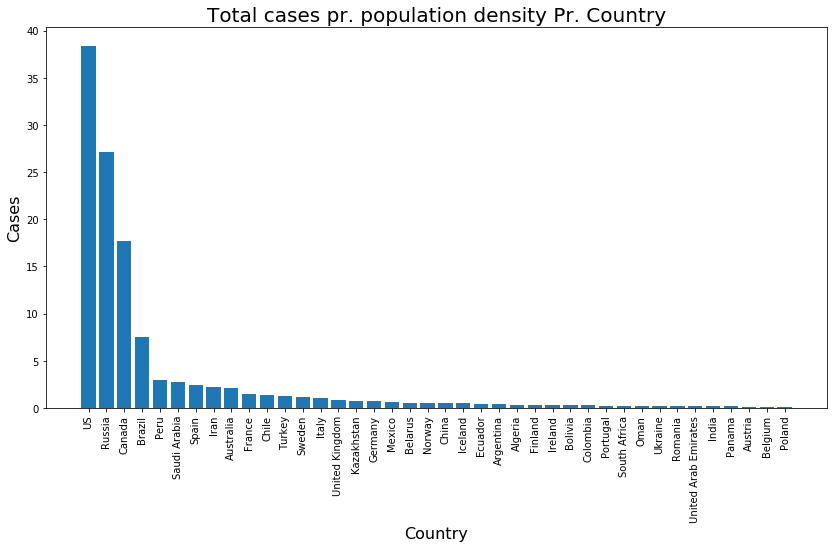

In [14]:
countrydata = {key : value/dfCountryPopulation['PopDensity'][key] for key, value in dict(dfCGlobal.groupby('Country/Region').sum()[dates[-1]]).items()}
ordered = sorted(countrydata.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v) for k, v in ordered][:40]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Total cases pr. population density Pr. Country', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

From the above finding it will be interesting to look at how the population of the different states affects the total cases. In the graph below is can be derived that the states around to New York are the ones that have the highest number of confirmed cases pr. one million citizen. Furthermore, it is a good mix of states with both low and high population.

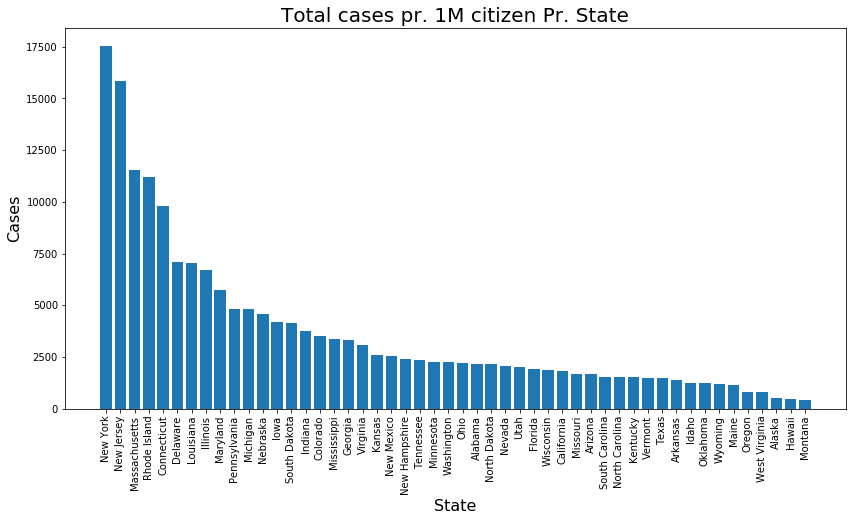

In [15]:
countrydata = {key : value/dfStatePopulation['Pop'][key] for key, value in dict(dfCUS.groupby('Province_State').sum()[dates[-1]]).items()}
ordered = sorted(countrydata.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v*1000000) for k, v in ordered]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Total cases pr. 1M citizen Pr. State', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

Now it is time to see how the population density affects the performance of the states. Moreover, it is seen from the below graph, New York performs significantly worse than all other states, even though it is the 7th most dense state. Furthermore, for New Jersey and Rhode Island, which have the highest and second-highest density, it can be seen that they perform a lot better. It, therefore, seems like the density of New York is not an excuse for poor performance. 

However, it can again be misleading, as the state is big and the majority of people live within the cities. So this can still be because of so many people living in New York City, which has a much higher density than the rest of New York.

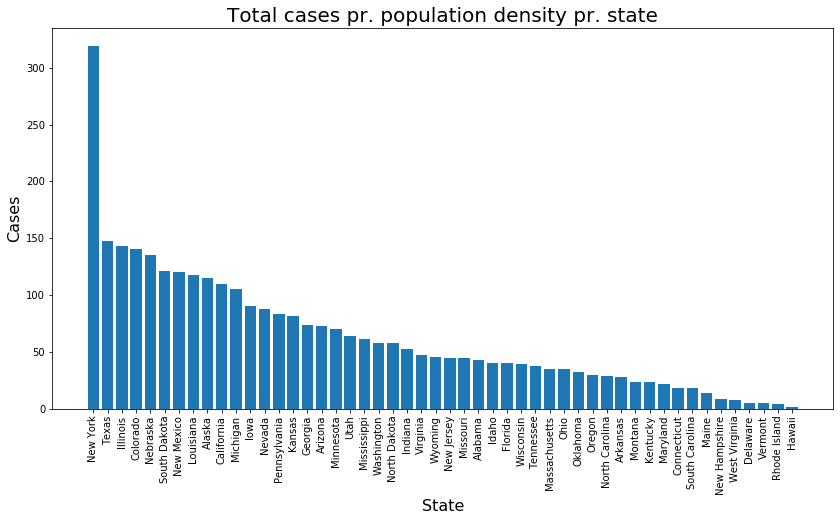

In [16]:
countrydata = {key : value/dfStatePopulation['Density'][key] for key, value in dict(dfCUS.groupby('Province_State').sum()[dates[-1]]).items()}
ordered = sorted(countrydata.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v) for k, v in ordered]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Total cases pr. population density pr. state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.xticks(rotation=90)
plt.show()

Now instead of looking at the number of confirmed cases, then there will be looked at the growth rate.

The global growth rate of the Coronavirus started high, with most countries not being prepared for it, meaning it spread rapidly throughout the entire globe. At later stages, when countries realized the potential threat the virus could have, the growth rate decreased, as more and more countries shut down and made laws to decrease the spread. In March the US got affected by COVID-19, putting millions of people in threat of getting the virus and therefore spread and the growth rate increased until they too had grasped the seriousness of the situation.

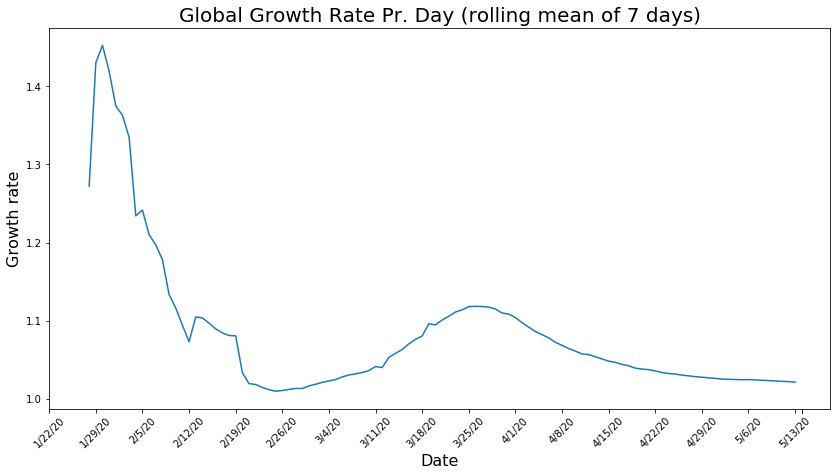

In [17]:
totalcases = [sum(dfCGlobal[date]) for date in dates]
growthrate = pd.DataFrame([0 if i<1 else cases/totalcases[i-1] for i, cases in enumerate(totalcases)], columns=['growtrate'])
growthrate = growthrate.rolling(7).mean()
plt.plot(dates, growthrate)
plt.title('Global Growth Rate Pr. Day (rolling mean of 7 days)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Growth rate', fontsize=16)
plt.xticks(['' if i % 7 != 0 else date for i, date in enumerate(dates)], rotation=45)
plt.show()

When looking into the growth rate for the US specifically, the numbers prove why the overall growth rate increased. As can be seen, during March COVID-19 hit the US and they were seemingly not well enough prepared for the situation resulting in their numbers rapidly increasing and continue being in the high end of the scale until they too got affairs into order.

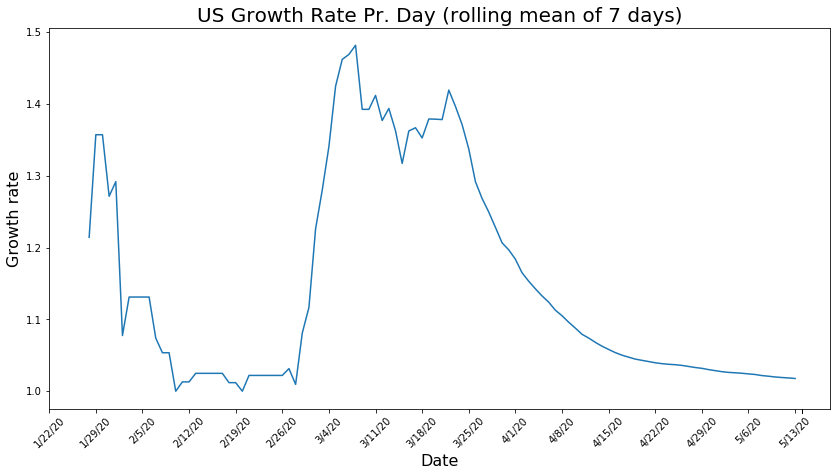

In [18]:
totalcases = [sum(dfCUS[date]) for date in dates]
growthrate = pd.DataFrame([0 if i<1 else cases/totalcases[i-1] for i, cases in enumerate(totalcases)], columns=['growtrate'])
growthrate = growthrate.rolling(7).mean()
plt.plot(dates, growthrate)
plt.title('US Growth Rate Pr. Day (rolling mean of 7 days)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Growth rate', fontsize=16)
plt.xticks(['' if i % 7 != 0 else date for i, date in enumerate(dates)], rotation=45)
plt.show()

As it looks like the US had a huge impact on the global growth rate and therefore, the spread of COVID-19, the growth rate of the different states will be further investigated.

There will be looked into the maximum average growth rate of a week per one million population density, as it will be the best indicator for which state performed worst taken their population into account. Aforementioned will eliminate any 'spikes' in the daily growth rate and ensure it does not look like a state performed better because the virus infected the given state earlier than other states.

Furthermore, as seen in the graph below, it is Alaska and the northern states which have performed the worst, which possibly is because of their relatively low population.

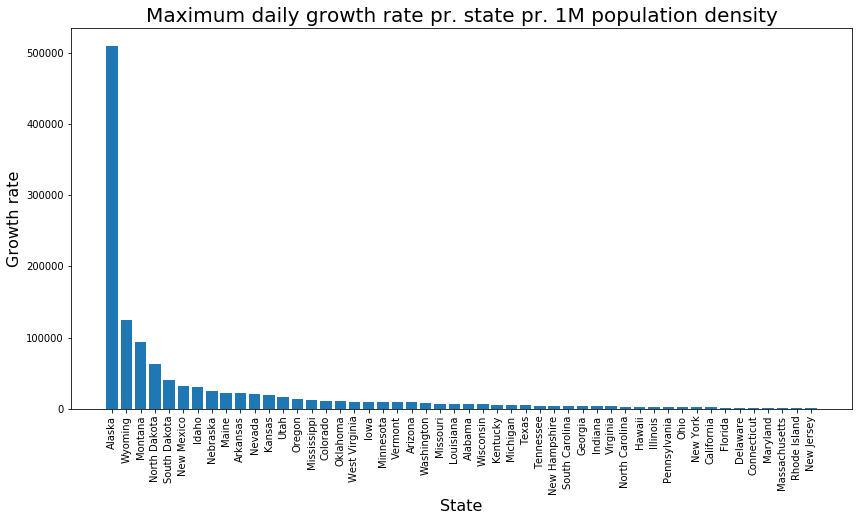

In [19]:
#avg Growthrate per state / pop density
countryGrowthRates = {}
totalCountry = dfCUS.groupby(['Province_State']).sum().T[6:]
for country in totalCountry:
    growthrates = np.array([ 0 if i == 0 else totalCountry[country][i] / totalCountry[country][i-1] for i, value in enumerate(totalCountry[country])])
    growthrates = growthrates[(~np.isnan(growthrates)) & ~np.isinf(growthrates)]
    countryGrowthRates[country] = float(pd.DataFrame(growthrates).rolling(7).mean().max()) / dfStatePopulation['Density'][country]

ordered = sorted(countryGrowthRates.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v*1000000) for k, v in ordered]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Maximum daily growth rate pr. state pr. 1M population density', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Growth rate', fontsize=16)
plt.xticks(rotation=90)
plt.show()

When looking at the same thing, just per one million citizens, it still seems like the states with low population are the ones who perform worst. So this can indicate that growth rate correlates with population and population densities.

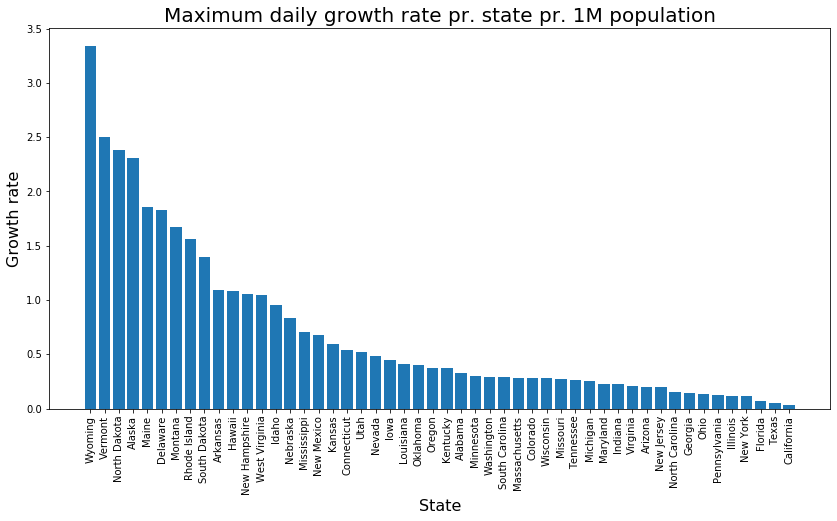

In [20]:
#avg Growthrate per state / population
countryGrowthRates = {}
totalCountry = dfCUS.groupby(['Province_State']).sum().T[6:]
for country in totalCountry:
    growthrates = np.array([ 0 if i == 0 else totalCountry[country][i] / totalCountry[country][i-1] for i, value in enumerate(totalCountry[country])])
    growthrates = growthrates[(~np.isnan(growthrates)) & ~np.isinf(growthrates)]
    countryGrowthRates[country] = float(pd.DataFrame(growthrates).rolling(7).mean().max()) / dfStatePopulation['Pop'][country]

ordered = sorted(countryGrowthRates.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
ordered = [(k,v*1000000) for k, v in ordered]
groups, amounts = zip(*ordered)
plt.bar(groups, amounts)
plt.title('Maximum daily growth rate pr. state pr. 1M population', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Growth rate', fontsize=16)
plt.xticks(rotation=90)
plt.show()

To see if there exist any correlations, four different scatter plot is created. These figures below show the following four correlations:

1. Total confirmed cases vs population
2. Total confirmed cases vs population density
3. Growth rate vs population
4. Growth rate vs population density

In [21]:
import scipy.stats
def rsq(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

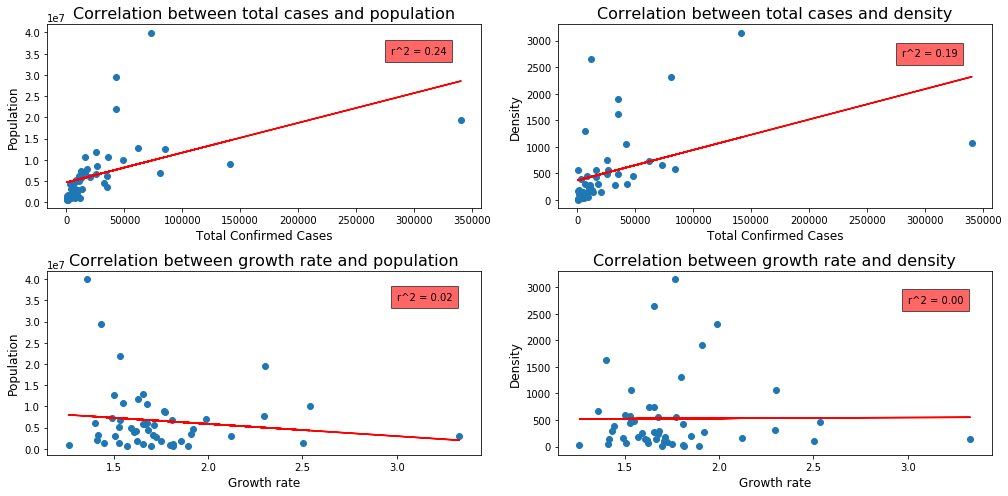

In [22]:
fig, axs = plt.subplots(2,2)

totalState = dfCUS.groupby(['Province_State']).sum().T[-2:-1]

totalCases, population = list(zip(*[(totalState[state][0], dfStatePopulation['Pop'][state]) for state in totalState]))

axs[0,0].scatter(totalCases, population)
axs[0,0].set_title('Correlation between total cases and population', fontsize=16)
axs[0,0].set_xlabel('Total Confirmed Cases', fontsize=12)
axs[0,0].set_ylabel('Population', fontsize=12)
totalCases = np.array(totalCases)
population = np.array(population)
m, b = np.polyfit(totalCases, population, 1)
axs[0,0].plot(totalCases, m*totalCases + b, 'r')
r2 = rsq(totalCases, population)
axs[0,0].text(280000, 35000000, 'r^2 = {:.2f}'.format(r2), bbox={'facecolor': 'r', 'alpha': 0.6, 'pad': 6})


totalCases, density = list(zip(*[(totalState[state][0], dfStatePopulation['Density'][state]) for state in totalState]))

axs[0,1].scatter(totalCases, density)
axs[0,1].set_title('Correlation between total cases and density', fontsize=16)
axs[0,1].set_xlabel('Total Confirmed Cases', fontsize=12)
axs[0,1].set_ylabel('Density', fontsize=12)
totalCases = np.array(totalCases)
density = np.array(density)
m, b = np.polyfit(totalCases, density, 1)
axs[0,1].plot(totalCases, m*totalCases + b, 'r')
r2 = rsq(totalCases, density)
axs[0,1].text(280000, 2700, 'r^2 = {:.2f}'.format(r2), bbox={'facecolor': 'r', 'alpha': 0.6, 'pad': 6})


stateGrowthRates = {}
totalStatePerDate = dfCUS.groupby(['Province_State']).sum().T[6:]
for state in totalState:
    growthrates = np.array([ 0 if i == 0 else totalStatePerDate[state][i] / totalStatePerDate[state][i-1] for i, value in enumerate(totalStatePerDate[state])])
    growthrates = growthrates[(~np.isnan(growthrates)) & ~np.isinf(growthrates)]
    stateGrowthRates[state] = float(pd.DataFrame(growthrates, columns=['growthrate']).rolling(7).mean().max())

growthrates, population = list(zip(*[(stateGrowthRates[state], dfStatePopulation['Pop'][state]) for state in totalStatePerDate]))

axs[1,0].scatter(growthrates, population)
axs[1,0].set_title('Correlation between growth rate and population', fontsize=16)
axs[1,0].set_xlabel('Growth rate', fontsize=12)
axs[1,0].set_ylabel('Population', fontsize=12)
growthrates = np.array(growthrates)
population = np.array(population)
m, b = np.polyfit(growthrates, population, 1)
axs[1,0].plot(growthrates, m*growthrates + b, 'r')
r2 = rsq(growthrates, population)
axs[1,0].text(3, 35000000, 'r^2 = {:.2f}'.format(r2), bbox={'facecolor': 'r', 'alpha': 0.6, 'pad': 6})


growthrates, density = list(zip(*[(stateGrowthRates[country], dfStatePopulation['Density'][country])for country in totalStatePerDate]))

axs[1,1].scatter(growthrates, density)
axs[1,1].set_title('Correlation between growth rate and density', fontsize=16)
axs[1,1].set_xlabel('Growth rate', fontsize=12)
axs[1,1].set_ylabel('Density', fontsize=12)
growthrates = np.array(growthrates)
density = np.array(density)
m, b = np.polyfit(growthrates, density, 1)
axs[1,1].plot(growthrates, m*growthrates + b, 'r')
r2 = rsq(growthrates, density)
axs[1,1].text(3, 2700, 'r^2 = {:.2f}'.format(r2), bbox={'facecolor': 'r', 'alpha': 0.6, 'pad': 6})

fig.tight_layout()
plt.show()

As the figure above shows, none seem to correlate. This can be due to some extreme cases, for instance, New York, which had a much higher number of confirmed cases, or Alaska, which had a much higher maximum growth rate. This might have shown a completely different picture if this was looked at per city and not per state, as all states do not have the same density across all its square km, as bigger cities spike while rural areas are low.

Now there will be looked into how the number of confirmed cases correlated with the number of performed tests.

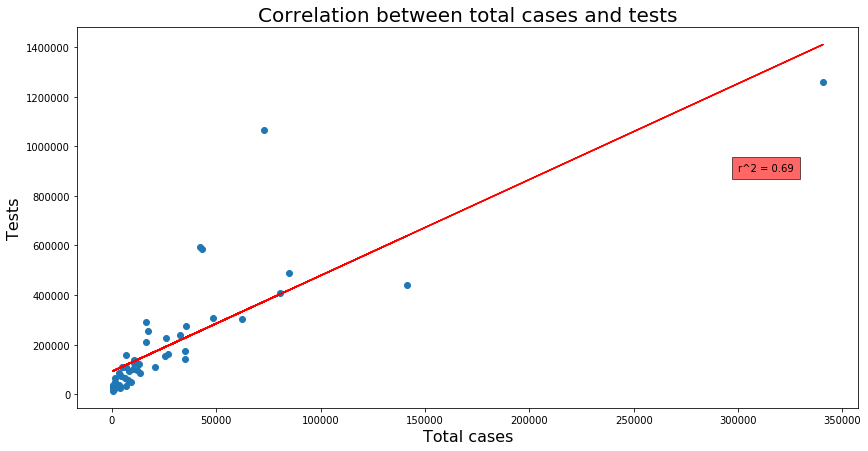

In [23]:
testsPerState, totalPerState = list(zip(*[(testsUS[dates[-1]][state], totalState[state][0]) for state in totalState]))

plt.scatter(totalPerState, testsPerState)
plt.title('Correlation between total cases and tests', fontsize=20)
plt.xlabel('Total cases', fontsize=16)
plt.ylabel('Tests', fontsize=16)
totalPerState = np.array(totalPerState)
testsPerState = np.array(testsPerState)
m, b = np.polyfit(totalPerState, testsPerState, 1)
plt.plot(totalPerState, m*totalPerState + b, 'r')
r2 = rsq(totalPerState, testsPerState)
plt.text(300000, 900000, 'r^2 = {:.2f}'.format(r2), bbox={'facecolor': 'r', 'alpha': 0.6, 'pad': 6})
plt.show()

As the above correlation shows, there seem to exist a correlation between the number of confirmed cases and the number of performed tests. This was also expected as the number of tests certainly is an upper bound of the number of confirmed cases. This just confirms the suspicion of the correlation between the numbers.

# Genre

* Visual Narrative
  * Visual Structuring
    * 'Consistent Visual Platform' has been used for each of the coming GIFs. When only changing the data and keeping the visual boundaries the same, it makes it easier to follow the evolution of the data. So, in this case, it makes it easier to follow the spread of COVID-19.
  * Highlighting
    * 'Motion' is used in the trajectory GIFs, where dots are moving in the graph over time. Again, this is done to visualize the spread of COVID-19 over time. 
    * 'Zooming' has been made an option for the user for the last date for each GIF. This has been done to make the user able to find their own story in the visualization and show the current state of COVID-19 in depth.
  * Transition guidance
    * 'Familiar Objects (but still cuts)' have been used for all of the GIFs, where each object changes a little in size or look for each frame. However, with many frames, it approaches 'Continuity Editing'. This supports the visualizations of the COVID-10 spread.
* Narrative Structure
  * Ordering
    * 'Linear' ordering is used as the frames in the GIFs are ordered by date. This makes sense as the virus spreads daily.
  * Interactivity
    * 'Details' are used for the folium maps with the red circles, where the circles are clickable to view more information about what the circle represents. This provides the viewer with the possibility to dive into the visualization and discover the parts that he finds attractive.
    * 'Selection' is possible for the trajectory bokeh plots, where the viewer can select the desired states or countries to view on the plot. 
  * Messaging
    * 'Captions / Headlines' and 'Annotations' are used to make the trajectory visualizations quicker to interpret.
    * 'Introductory Text' and 'Summary' are used to provide the viewer with an insight into why the visualizations are exciting and then what could be derived from it. 

# Visualizations

To see how the COVID-19 has spread across the US, a heatmap is created. The gif below shows a heatmap over time of the total confirmed cases of each state.

In [24]:
state_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
dfCUSState = dfCUS.groupby('Province_State').sum()
stateCoordinates = pd.read_csv('statelatlong.csv').set_index('State')

data = pd.DataFrame(stateCoordinates['Short'])
data['Confirmed'] = data.apply(lambda row: dfCUSState[dates[-1]][row.index])


for date in dates:
    m = folium.Map(location=[40,-100], tiles = "cartodbpositron", zoom_start = 4)
    data['Confirmed'] = data.apply(lambda row: dfCUSState[date][row.index])
    folium.Choropleth(
        geo_data=state_geo,
        name='choropleth',
        data=data,
        columns=['Short', 'Confirmed'],
        key_on='feature.id',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Total Confirmed Cases ({})'.format(date)
    ).add_to(m)
    
    bytes_to_png = m._to_png()
    image = Image.open(io.BytesIO(bytes_to_png))
    image.save('StateGeo\{}.png'.format(date.replace('/', '-')))

m

In [25]:
images = [imageio.imread('StateGeo\{}.png'.format(date.replace('/', '-'))) for date in dates]
kargs = { 'duration': 0.25 }
imageio.mimsave('StateGeo\gif.gif', images, 'GIF', **kargs )

<img src="StateGeo\gif.gif" width="1000" align="center">

From the gif, not much can be derived. The only thing to see is that it looks like it started to be most intense on the west side, to begin with, but when New York got infected, then no states could compare with their total number of confirmed cases. 

It can be hard to see how the individual states performed over time with this gif, so a new one is created with a circle for each state, where the size shows the total number of confirmed cases for the state.

In [26]:
dfCUSState = dfCUS.groupby('Province_State').sum()
stateCoordinates = pd.read_csv('statelatlong.csv').set_index('State')

for date in dates:
    m = folium.Map(location=[40,-100], tiles = "cartodbpositron", zoom_start = 4)

    for i, amount in enumerate(dfCUSState[date]):
        lat, long = stateCoordinates['Lat'][dfCUSState.index[i]], stateCoordinates['Long'][dfCUSState.index[i]]
        if amount > 5:
            popup = '{}\n{}'.format(dfCUSState.index[i], amount)
            folium.CircleMarker([lat, long], radius=math.log(amount, 10)*10, fill=True, color='#FF000044', weight=0, popup=popup).add_to(m)

    bytes_to_png = m._to_png()
    image = Image.open(io.BytesIO(bytes_to_png))
    image.save('StateCircles\{}.png'.format(date.replace('/', '-')))
        
m

In [27]:
images = [imageio.imread('StateCircles\{}.png'.format(date.replace('/', '-'))) for date in dates]
kargs = { 'duration': 0.25 }
imageio.mimsave('StateCircles\gif.gif', images, 'GIF', **kargs )

<img src="StateCircles\gif.gif" width="1000" align="center">

From the above gif, it is possible to see how the individual states perform. Where it before only looked like it was New York and maybe California, Illinois, and the states around New York that suffered from COVID-19, it is now possible to see that it affect the entire US. 

Above the gif, a folium map for the latest date is created where it is possible to click the circles to see the total number of confirmed cases for each state.

States are still not representative enough to see where in the US COVID-19 has infected the most. It could still be that it is only one or two cities in the state that is holding all the confirmed cases. Therefor the same visualisation will be created, just showing for each city.

In [28]:
for date in dates:
    m = folium.Map(location=[40,-100], tiles = "cartodbpositron", zoom_start = 4)

    for i, amount in enumerate(dfCUS[date]):
        lat, long = dfCUS['Lat'][i], dfCUS['Long'][i]
        if amount > 5 and lat != 0:
            popup = '{}\n{}\n{}'.format(dfCUS['Province_State'][i], dfCUS['Admin2'][i], amount)
            folium.CircleMarker([lat, long], radius=math.log(amount, 10)*10, fill=True, color='#FF000044', weight=0, popup=popup).add_to(m)

    bytes_to_png = m._to_png()
    image = Image.open(io.BytesIO(bytes_to_png))
    image.save('StateCityCircles\{}.png'.format(date.replace('/', '-')))
        
m

In [29]:
images = [imageio.imread('StateCityCircles\{}.png'.format(date.replace('/', '-'))) for date in dates]
kargs = { 'duration': 0.25 }
imageio.mimsave('StateCityCircles\gif.gif', images, 'GIF', **kargs )

<img src="StateCityCircles\gif.gif" width="1000" align="center">

From the above GIF it is easier to see how the COVID-19 spreads from the coasts towards the centre, which could indicate that most tourists visit the states near the coasts.

From the folium map above the GIF, it can also be seen that it is mainly the larger cities like Los Angeles, San Fransisco, Denver, New York City, New Orleans and Atlanta for naming a few that suffers the most for COVID-19. This also makes sense as it is the cities who have the highest populations, and the population is undoubtedly an upper bound for the total number of confirmed cases.

While these visualisations show how the COVID-19 spreads, it can be hard to tell when the growth is slowing down, and the spread of the virus is more or less under control.

Therefore the following visualisation is created, to see how the total number of cases is compared to the number of new cases (in the last week). This will be done using a double logarithmic scale, as it is the natural scale for plotting a growth. 

In [30]:
lines = {}

def trajectory(df, group):
    global lines
    groupeddf = df.groupby([group]).sum()

    newInPastWeek = {}
    for i, date in enumerate(dates):
        if i > 6:
            newInPastWeek[date] = {groupeddf.index[j] : now - groupeddf[dates[i-7]][j] for j, now in enumerate(groupeddf[date])}

    prev = {state : {'x' : [], 'y': []} for state in groupeddf.index}

    filenames = []
    for date in newInPastWeek.keys():
        valid = False
        for state in groupeddf.index:
            if state in focusStates or state in focusCountries:
                prev[state]['x'].append(groupeddf[date][state])
                prev[state]['y'].append(newInPastWeek[date][state])
                plt.scatter(groupeddf[date][state], newInPastWeek[date][state])
                plt.plot(prev[state]['x'], prev[state]['y'])
                plt.xlim(10, 10**7)
                plt.ylim(10, 10**7)
                if groupeddf[date][state] > 10 and newInPastWeek[date][state] > 10:
                    plt.text(groupeddf[date][state], newInPastWeek[date][state], state)
                    valid = True
        
        if valid:
            plt.title('Trajectory of COVID-19 Confirmed Cases ({})'.format(date), fontsize=20)
            plt.xlabel('Total Confirmed Cases', fontsize=16)
            plt.ylabel('New Confirmed Cases (In the past week)', fontsize=16)
            plt.xscale('log')
            plt.yscale('log')
            plt.grid()
            filename = '{}\{}.jpg'.format(group, date).replace('/','-')
            filenames.append(filename)
            plt.savefig(filename)
            plt.close()
    
    lines[group] = prev
    images = [imageio.imread(filename) for filename in filenames]
    kargs = { 'duration': 0.25 }
    imageio.mimsave('{}\gif.gif'.format(group).replace('/','-'), images, 'GIF', **kargs )

In [31]:
def interactiveTrajectory(data):
    from bokeh.plotting import figure, show
    from bokeh.io import output_notebook
    from bokeh.models import ColumnDataSource, FactorRange, Legend, PrintfTickFormatter
    from bokeh.palettes import Category10
    output_notebook()
    
    p = figure(title='Trajectory of COVID-19 Confirmed Cases ({})'.format(dates[-1]), x_axis_label='Total Confirmed Cases', y_axis_label='New Confirmed Cases (in the past week)', x_axis_type='log', y_axis_type='log', x_range=(10**3, 10**6), y_range=(10**3, 10**5.5))
    p.plot_height = 500
    p.plot_width = 950
    
    items= []
    i = 0
    for state, item in data.items():
        if state in focusStates or state in focusCountries:
            line = p.line(item['x'], item['y'], line_width= 2, muted_alpha = 0.1, muted = True, color=Category10[10][i%10], alpha=0.8)
            dots = p.scatter(item['x'][-1::-7], item['y'][-1::-7], muted_alpha = 0.1, muted = True, color=Category10[10][i%10], alpha=0.8)
            items.append((state, [line, dots]))
            i += 1
        
    legend = Legend(items=items, location=(0, -30))
    p.add_layout(legend, 'left')
    p.legend.click_policy="mute"

    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    show(p)

In [32]:
trajectory(dfCUS, 'Province_State')
trajectory(dfCGlobal, 'Country/Region')

In [33]:
interactiveTrajectory(lines['Province_State'])

Loading BokehJS ...

<img src="Province_State\gif.gif" width="1000" align="center">

The GIF above shows the top 20 states flows out the same line, which shows that they all experience exponential growth. However, from around the 10th of April, the dots start to drastically decline, which indicates the states have started to beat the exponential growth and are therefore starting to take control over the spread. 

Above the GIF, an interactive plot is created for the last date, where the dots on the lines represents a week in time.

The states are in the early stages and do not have the spread under control yet. If the US is compared to the rest of the countries, it can be seen that the US has not drastically declined yet compared to for instance, China, Norway, Denmark, Netherland and Germany. This can be seen on the GIF and Bokeh plot below.

In [34]:
interactiveTrajectory(lines['Country/Region'])

Loading BokehJS ...

<img src="Country-Region\gif.gif" width="1000" align="center">

The GIF and the Bokeh plot indicates as the US still have ways to go, before having the spread under control. However, they are not the only country who still have work to do, for instance, Russia and Brazil do not have the spread of COVID-19 under control either.

# Discussion

Throughout the project, multiple illustrations have been made on how the Coronavirus has affected the world and how each country is handling the crisis. When making the plots, it can be seen on numerous occasions that the number of cases and deaths spike exponentially when reaching march and especially mid-march. When later investigating the case that the US is responsible for the sudden spike, finding data supporting the claim, and then being able to deduct that the US has a big claim to why the global numbers are, was quite interesting. 

When further investigating how the numbers are for the specific states in the US, there were a few cases that fared as expected, but also a few surprises. New York is not handling the Coronavirus well, as the media has portrayed on many occasions ([NY1](https://www.ny1.com/nyc/all-boroughs/news/2020/05/11/coronavirus-death-toll-nyc-thousands-of-deaths-may-be-indirectly-related)). On the other hand, Florida is handling the crisis better than expected. During the beginning to mid-march, there was spring break for many college students. During this break, many go to Florida to have fun and party, and therefore not being worried or couscous when it comes to the epidemic. The expectation was that Florida would, therefore, be reporting a higher number than the data has proven. This could be because most people come from other states during spring break and they had the chance to go back to their state when their break was done, ultimately resulting in other states numbers increasing if they contracted Coronavirus during their spring break and Floridas numbers remaining low.

The GIFs and trajectory graphs are tremendously insightful when trying to get an overview of how the US and the world as a whole have handled Coronavirus. The trajectories show how the numbers have increased over time while also being able to illustrate how the different countries have fared. While bar graphs can show the numbers as they are now, the animations show how the numbers got where they are now. For example, seeing how the US went from not being on the graphs at all to all of a sudden become the worst at handling the crisis is very interesting to see, and the animations illustrate it perfectly.

The correlation between the population/density and the states was not sufficient to tell if there existed a correlation, as the states are vast and include areas with both high and low population/density. Therefore, it should have been done for each city instead of each state to provide a better indication for correlation. It is the same for the correlation between the states and the number of performed tests.

Even though the visualisations are useful to see the spread of COVID-19, it is hard to compare the different states' performance. To better compare the states (or the cities if that had been done), the visualisations should have taken the populations/density and tests into account. For instance, in the trajectory visualisation is look like New York and New Jersey are performing a lot worse than the other states. However, it is not known if it is because of their higher population/density or a higher testing rate.

# Contributions

This project has been done in cooperation and most of the code has been written together. Both have contributed equally in the data collection part and Jonas have been more into the graphs and details of the basics stats and data analysis and Mikkel have been more involved in the visualisation part.

In [35]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>